In [ ]:
import os
import pandas as pd
import numpy as np

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("prokshitha/home-value-insights")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'home-value-insights' dataset.
Path to dataset files: /kaggle/input/home-value-insights


In [ ]:
csv_path = os.path.join(path, "house_price_regression_dataset.csv")

df = pd.read_csv(csv_path)

df.head()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
0,1360,2,1,1981,0.599637,0,5,2.623829e+05
1,4272,3,3,2016,4.753014,1,6,9.852609e+05
2,3592,1,2,2016,3.634823,0,9,7.779774e+05
3,966,1,2,1977,2.730667,1,8,2.296989e+05
4,4926,2,1,1993,4.699073,0,8,1.041741e+06


# Since The table contain numerical variables its a regression

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Square_Footage        1000 non-null   int64  
 1   Num_Bedrooms          1000 non-null   int64  
 2   Num_Bathrooms         1000 non-null   int64  
 3   Year_Built            1000 non-null   int64  
 4   Lot_Size              1000 non-null   float64
 5   Garage_Size           1000 non-null   int64  
 6   Neighborhood_Quality  1000 non-null   int64  
 7   House_Price           1000 non-null   float64
dtypes: float64(2), int64(6)
memory usage: 62.6 KB


In [ ]:
df.isnull().sum()

,0
Square_Footage,0
Num_Bedrooms,0
Num_Bathrooms,0
Year_Built,0
Lot_Size,0
Garage_Size,0
Neighborhood_Quality,0
House_Price,0


# No Null Values

In [ ]:
df.columns

Index(['Square_Footage', 'Num_Bedrooms', 'Num_Bathrooms', 'Year_Built',
       'Lot_Size', 'Garage_Size', 'Neighborhood_Quality', 'House_Price'],
      dtype='object')

In [ ]:
df.shape

(1000, 8)

In [ ]:
df.describe()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,2815.422000,2.990000,1.973000,1986.550000,2.778087,1.022000,5.615000,6.188610e+05
std,1255.514921,1.427564,0.820332,20.632916,1.297903,0.814973,2.887059,2.535681e+05
min,503.000000,1.000000,1.000000,1950.000000,0.506058,0.000000,1.000000,1.116269e+05
25%,1749.500000,2.000000,1.000000,1969.000000,1.665946,0.000000,3.000000,4.016482e+05
50%,2862.500000,3.000000,2.000000,1986.000000,2.809740,1.000000,6.000000,6.282673e+05
75%,3849.500000,4.000000,3.000000,2004.250000,3.923317,2.000000,8.000000,8.271413e+05
max,4999.000000,5.000000,3.000000,2022.000000,4.989303,2.000000,10.000000,1.108237e+06


# The target is The house price

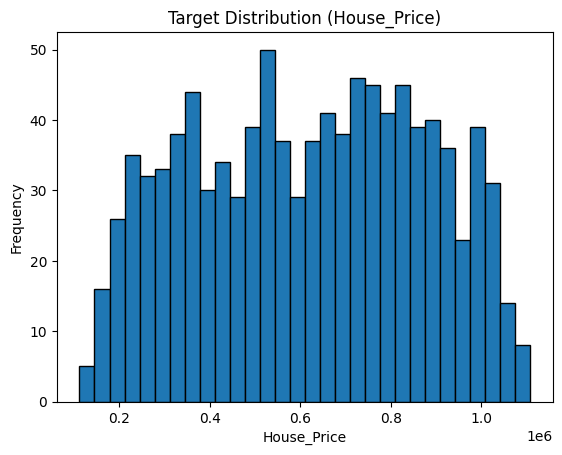

In [ ]:
import matplotlib.pyplot as plt

def check_target_distribution(df, target_column):
  df[target_column].hist(bins=30, edgecolor='black')

  plt.title(f"Target Distribution ({target_column})")
  plt.xlabel(target_column)
  plt.ylabel("Frequency")
  plt.grid(False)

  plt.show()

check_target_distribution(df, 'House_Price')

In [ ]:

from sklearn.model_selection import train_test_split

X= df.drop(['House_Price'], axis= 1).astype(float)
y= df['House_Price'].astype(float) #Target Value

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=15) # train_size= 0.8, test_size= 0.2

print("Train Shape",X_train.shape)
print("Test Shape",X_test.shape)

Train Shape (800, 7)
Test Shape (200, 7)


# Why We Scaled the Features

The features have different ranges (e.g., square footage vs. number of bedrooms).

Scaling puts all features on the same scale, preventing large-value features from dominating the model.

It helps the model learn more efficiently and improves numerical stability.

Ensures fair contribution of each feature during training.

In [ ]:
from sklearn.preprocessing import StandardScaler
cols_for_scale = ["Square_Footage","Num_Bedrooms","Num_Bathrooms","Year_Built","Lot_Size","Garage_Size","Neighborhood_Quality"]
scaler = StandardScaler()
X_train[cols_for_scale] =scaler.fit_transform(X_train[cols_for_scale])
X_test[cols_for_scale] =scaler.transform(X_test[cols_for_scale])

# Model Training

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score
model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [ ]:
print("MAE",mean_absolute_error(y_test,y_pred))
print("MSE",mean_squared_error(y_test,y_pred))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))
print("R2 SCORE",r2_score(y_test,y_pred))


MAE 7511.209435634045
MSE 89653845.48250988
RMSE 9468.571459439374
R2 SCORE 0.99856041967541


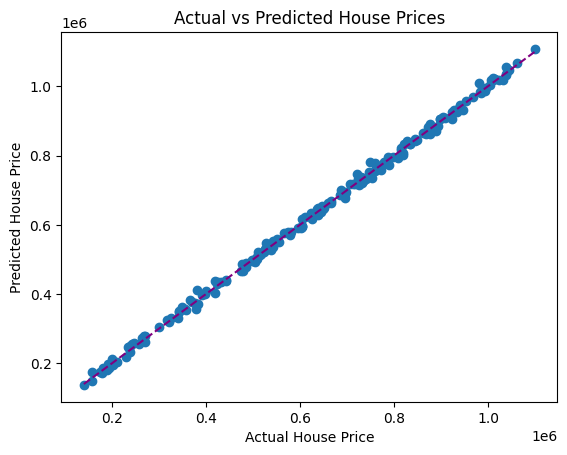

In [ ]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual House Price")
plt.ylabel("Predicted House Price")
plt.title("Actual vs Predicted House Prices")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='purple', linestyle='--')
plt.show()

# Final Result

A Linear Regression model was trained to predict house prices using 7 numerical features.

The model achieved very high accuracy with an R² score of 0.9986, meaning it explains almost all the variation in house prices.

The MAE (~ 7,511) and RMSE (~ 9,469) indicate small prediction errors compared to the overall price range.

The Actual vs. Predicted plot shows points closely aligned with the diagonal line, confirming strong prediction performance.

Overall, the model performs extremely well and is suitable for house price prediction on this dataset.